In [459]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

train_df = pd.read_csv("files/CarPrice_Assignment (1).csv")

In [460]:
train_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [461]:
train_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [462]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Axes: >

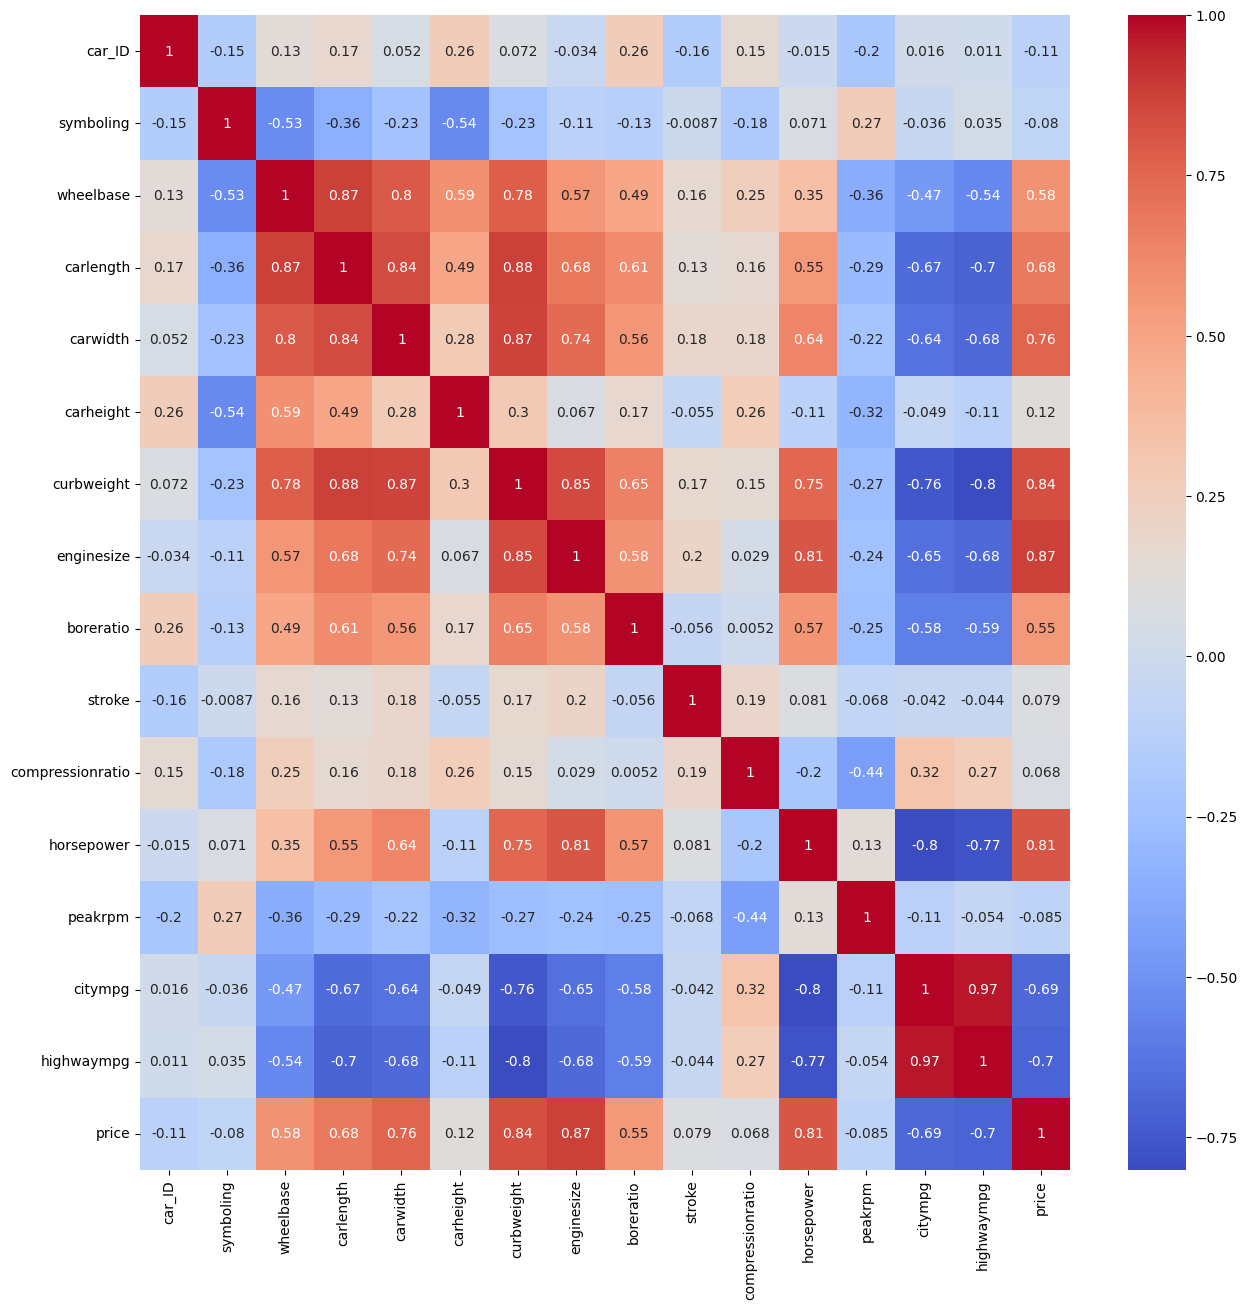

In [463]:
corr_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [464]:
features = list(train_df.columns)
features.remove("CarName")
features.remove("car_ID")

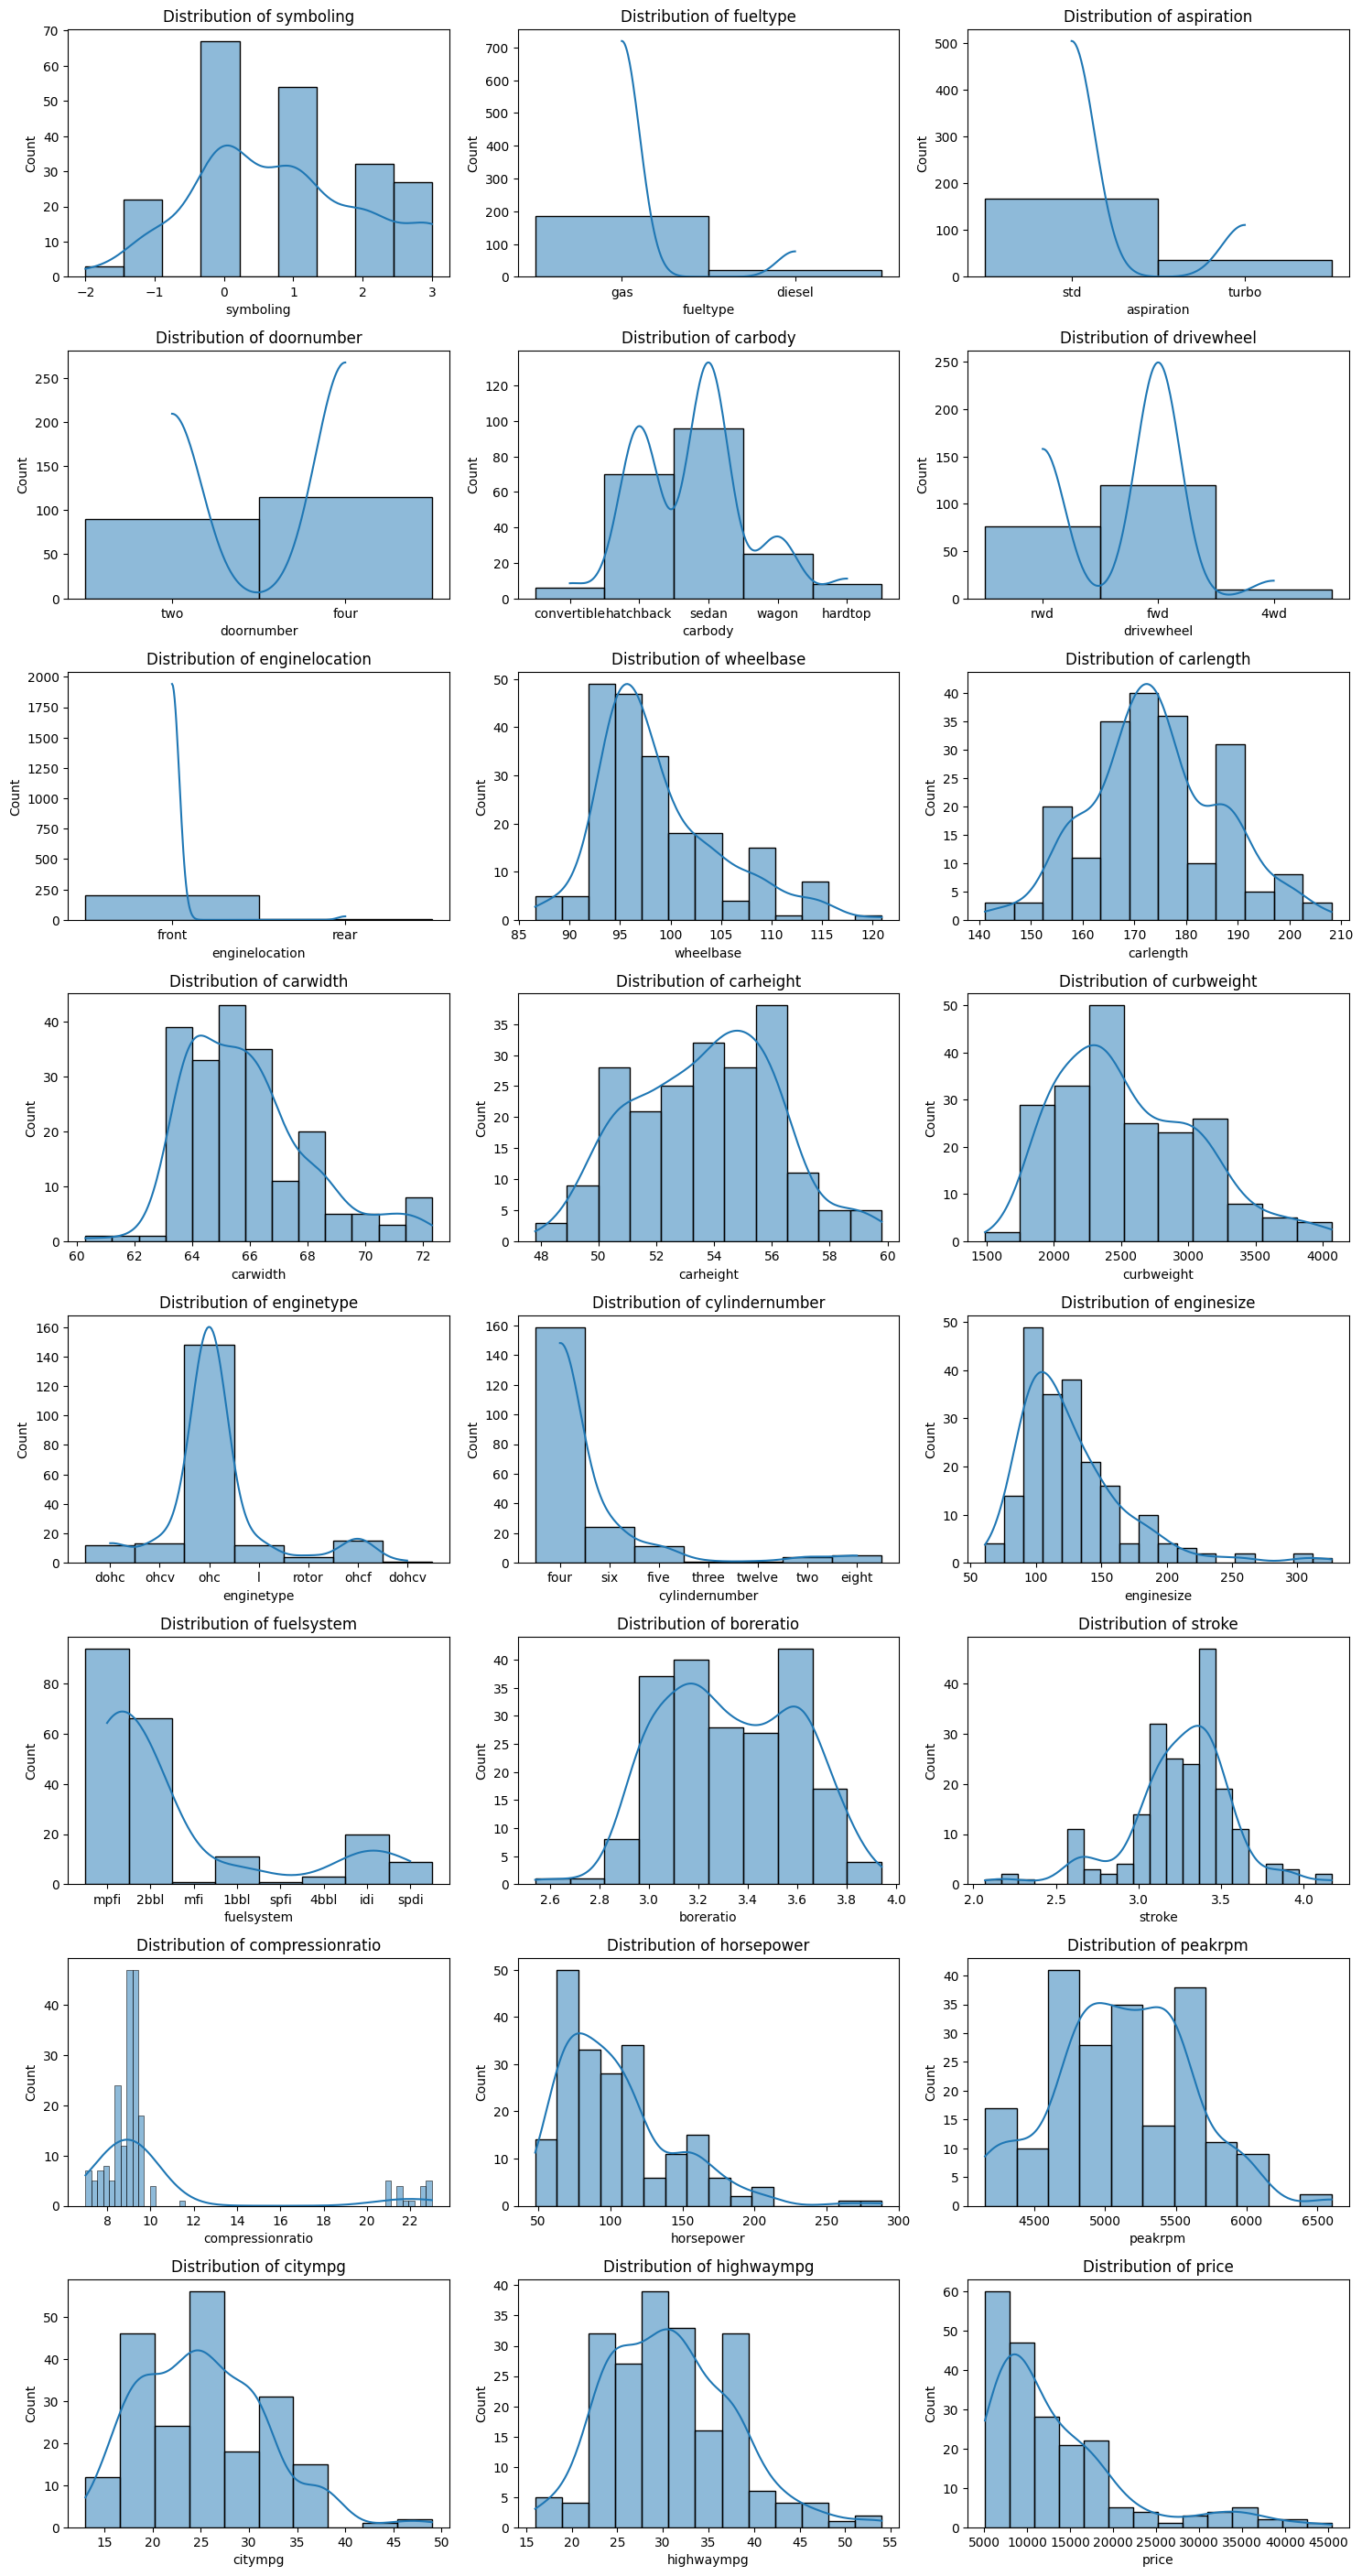

In [465]:
plt.figure(figsize=(15,len(features) * 3.5))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 3, i)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [466]:
target_mean = round(train_df['price'].mean(), 2)
target_median = train_df['price'].median()
# target_mode = train_df['price'].mode()[0]

In [467]:
target_bins = train_df['price'] // 100 * 100

# 0 - 100 --> 0
# 101 - 200 --> 1
# 2001 - 300 --> 2
#...

target_adjust_mode = target_bins.mode()[0]
target_adjust_mode

8900.0

In [468]:
target_bins.unique()

array([13400., 16500., 13900., 17400., 15200., 17700., 18900., 23800.,
       17800., 16400., 16900., 20900., 21100., 24500., 30700., 41300.,
       36800.,  5100.,  6200.,  6500.,  5500.,  6300.,  7900.,  6600.,
        7600.,  8500.,  8900., 12900.,  6400.,  6800.,  5300.,  7100.,
        7200.,  7800.,  9000.,  8800., 10200., 10300.,  6700., 11000.,
       32200., 35500., 36000.,  6000.,  7300., 10900., 11800., 13600.,
       15600.,  8400., 10500., 10700., 11200., 18200., 18300., 25500.,
       28200., 28100., 31600., 34100., 35000., 40900., 45400.,  6100.,
        9900., 12600., 14800., 14400.,  6900.,  8100.,  9200.,  5400.,
        7000.,  7700.,  7400.,  8200.,  9500., 14300., 17100., 19600.,
       11900., 13200., 12400., 13800., 15500., 16600., 17000., 17900.,
       18100., 12700., 22000., 32500., 34000., 37000., 31400.,  9800.,
       12100., 15000., 18600., 10100.,  8000., 11600.,  8700.,  8300.,
        9600., 11100., 11500., 17600., 10600., 10800., 15900., 15700.,
      

In [469]:
target_bins.value_counts().iloc[:10]

price
8900.0     6
9200.0     6
9900.0     6
16500.0    5
7700.0     5
6600.0     5
7900.0     5
8400.0     4
7600.0     4
13400.0    4
Name: count, dtype: int64

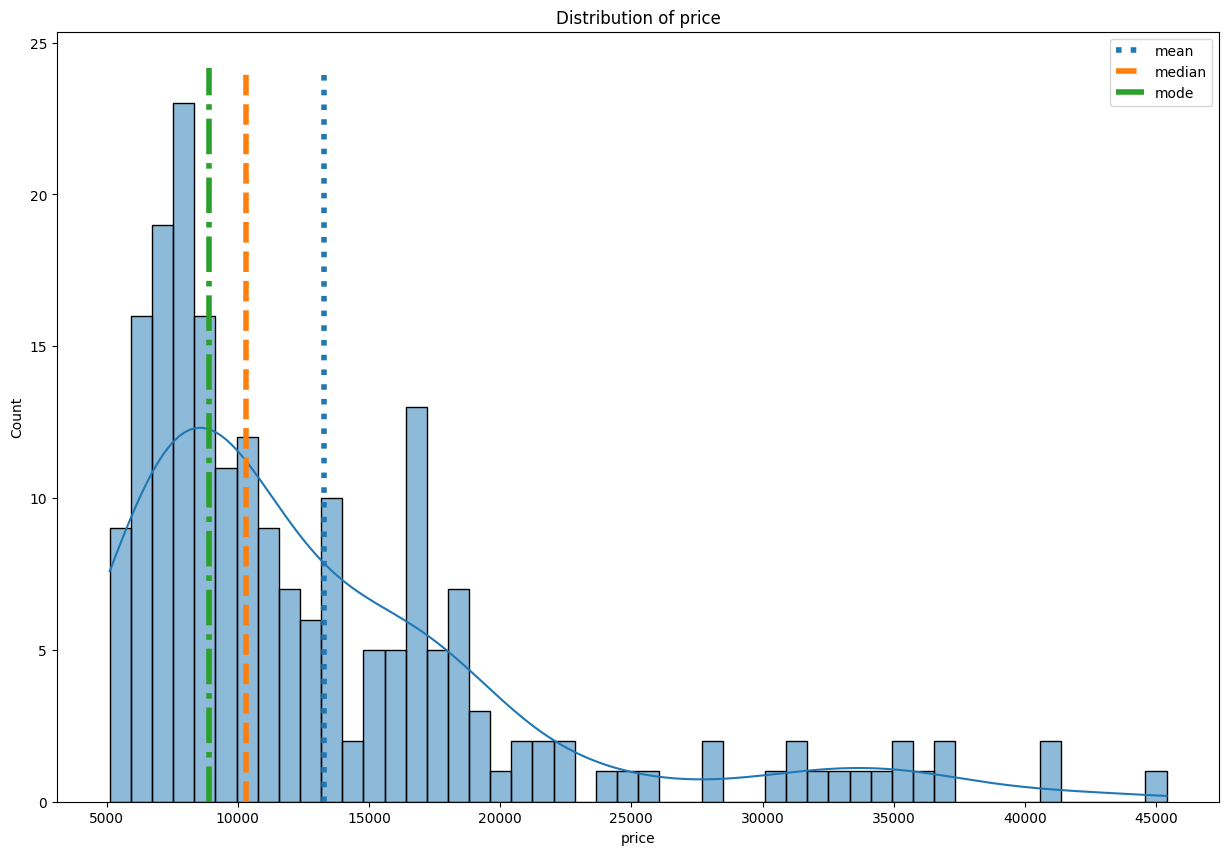

In [470]:
plt.figure(figsize=(15, 10))

sns.histplot(train_df['price'], bins=50, kde=True)

y = np.linspace(0, plt.gca().get_ylim()[1], 10)

plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label="median", linestyle='--', linewidth=4)
# plt.plot([target_mode] * 10, y, label="mode", linestyle='-.', linewidth=4)
plt.plot([target_adjust_mode] * 10, y, label="mode", linestyle='-.', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

In [471]:
missing_values = train_df.isnull().sum()

fig = go.Figure(data=[go.Bar(x=missing_values.index, y=missing_values.values)])
fig.update_layout(title='Missing Values Count',
                  xaxis_title='Features',
                  yaxis_title='Number of Missing Values')
fig.show()


In [472]:
b_features = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]
n_features = []

In [473]:
for i, feature in enumerate(features, 1):
    if feature not in b_features:
        n_features.append(feature)


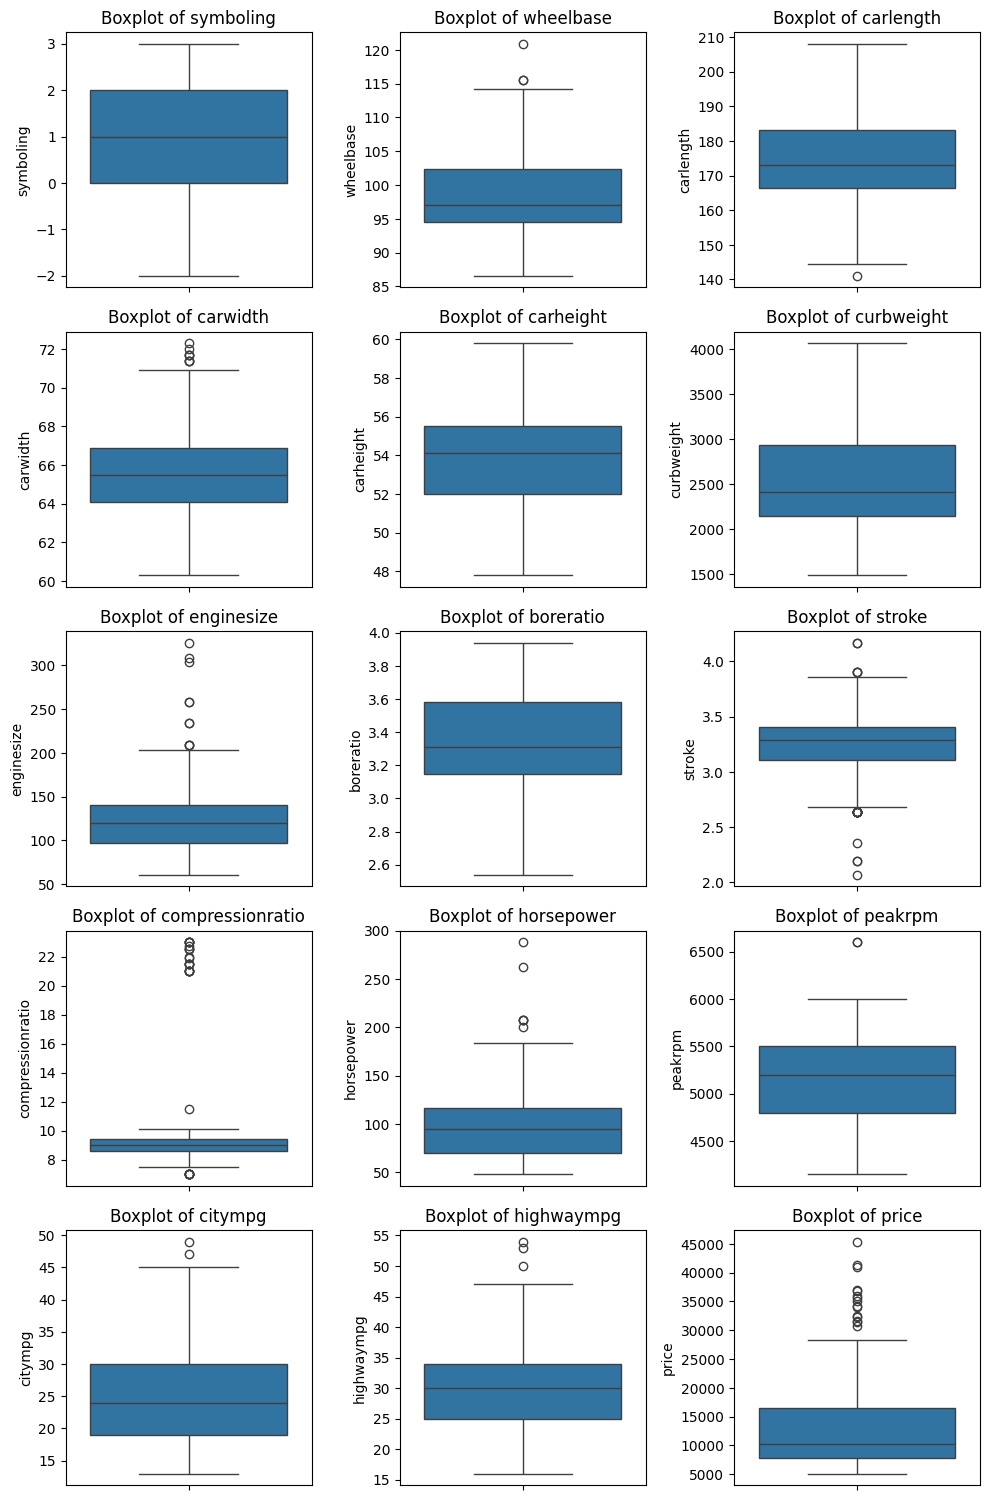

In [474]:
plt.figure(figsize=(10,len(n_features) * 3))

for i, feature in enumerate(n_features, 1):
    plt.subplot(len(n_features), 3, i)
    sns.boxplot(train_df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [488]:
# train_df.loc[train_df['wheelbase'] > 110, 'wheelbase'] = train_df['wheelbase'].median()
# train_df.loc[(train_df['carlength'] < 150) | (train_df['carlength'] > 201), 'carlength'] = train_df['carlength'].median()
# train_df.loc[(train_df['carwidth'] < 62) | (train_df['carwidth'] > 69), 'carwidth'] = train_df['carwidth'].median()
# train_df.loc[train_df['enginesize'] > 200, 'enginesize'] = train_df['enginesize'].median()
# train_df.loc[(train_df['stroke'] < 2.9) | (train_df['stroke'] > 3.8), 'stroke'] = train_df['stroke'].median()
# train_df.loc[(train_df['compressionratio'] < 8.65) | (train_df['compressionratio'] > 9.55), 'compressionratio'] = train_df['compressionratio'].median()
# train_df.loc[train_df['horsepower'] > 190, 'horsepower'] = train_df['horsepower'].median()
# train_df.loc[train_df['peakrpm'] > 6000, 'peakrpm'] = train_df['peakrpm'].median()
# train_df.loc[train_df['citympg'] > 45, 'citympg'] = train_df['citympg'].median()
# train_df.loc[train_df['highwaympg'] > 47, 'highwaympg'] = train_df['highwaympg'].median()
# train_df.loc[train_df['price'] > 22400, 'price'] = train_df['price'].median()

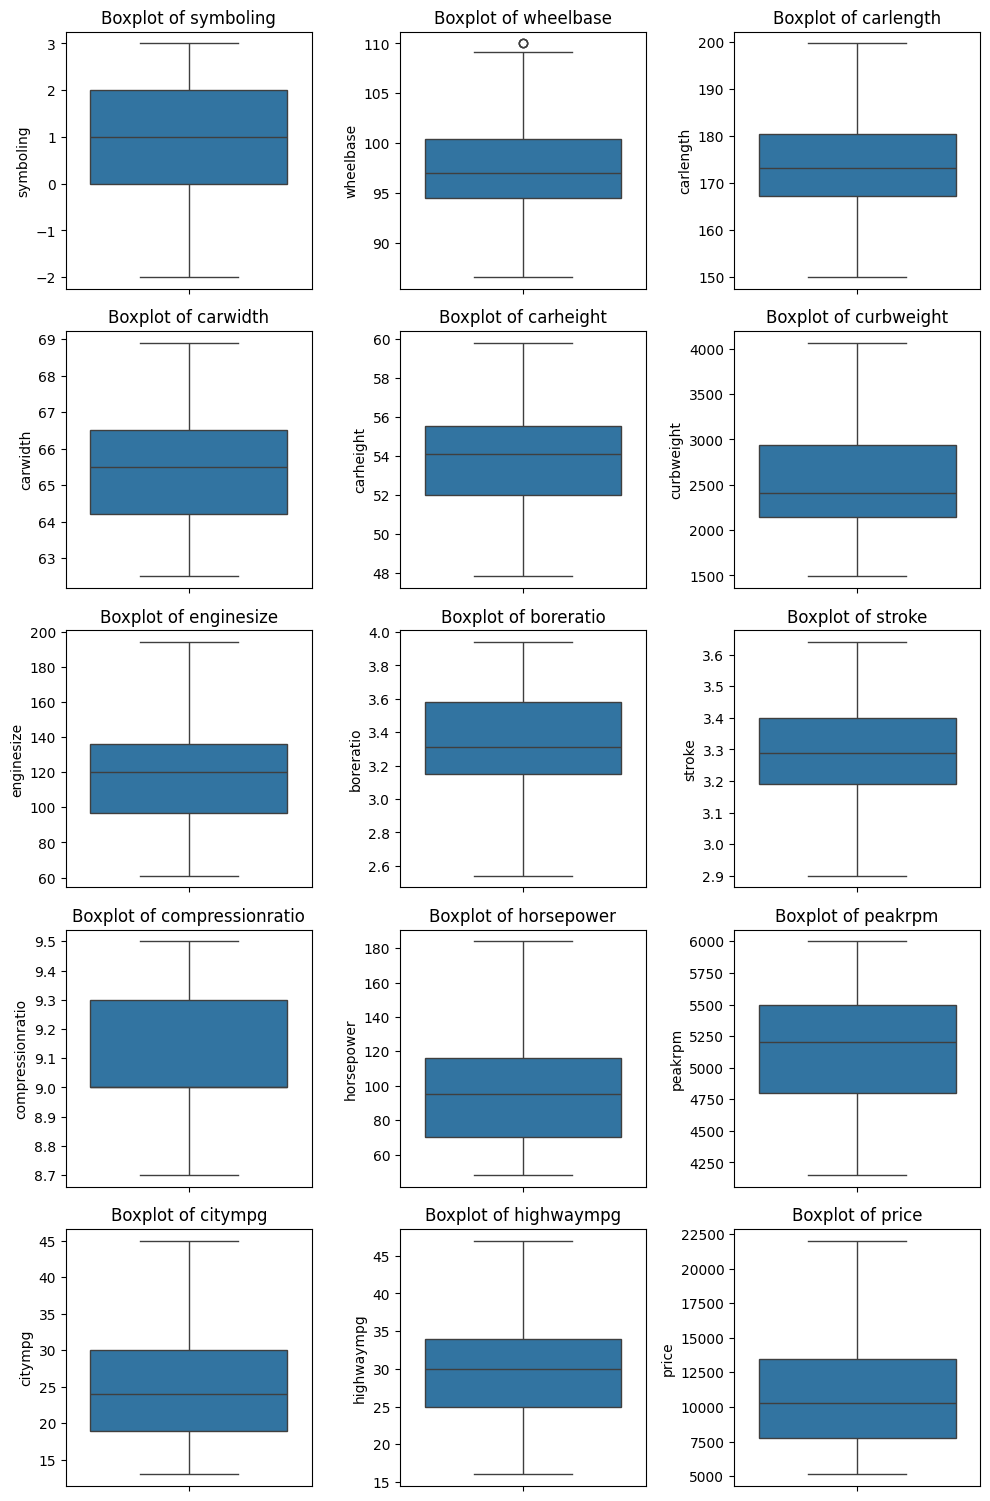

In [489]:
# plt.figure(figsize=(10,len(n_features) * 3))

# for i, feature in enumerate(n_features, 1):
#     plt.subplot(len(n_features), 3, i)
#     sns.boxplot(train_df[feature])
#     plt.title(f'Boxplot of {feature}')

# plt.tight_layout()
# plt.show()

In [477]:
train_df.select_dtypes(include="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CarName         205 non-null    object
 1   fueltype        205 non-null    object
 2   aspiration      205 non-null    object
 3   doornumber      205 non-null    object
 4   carbody         205 non-null    object
 5   drivewheel      205 non-null    object
 6   enginelocation  205 non-null    object
 7   enginetype      205 non-null    object
 8   cylindernumber  205 non-null    object
 9   fuelsystem      205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


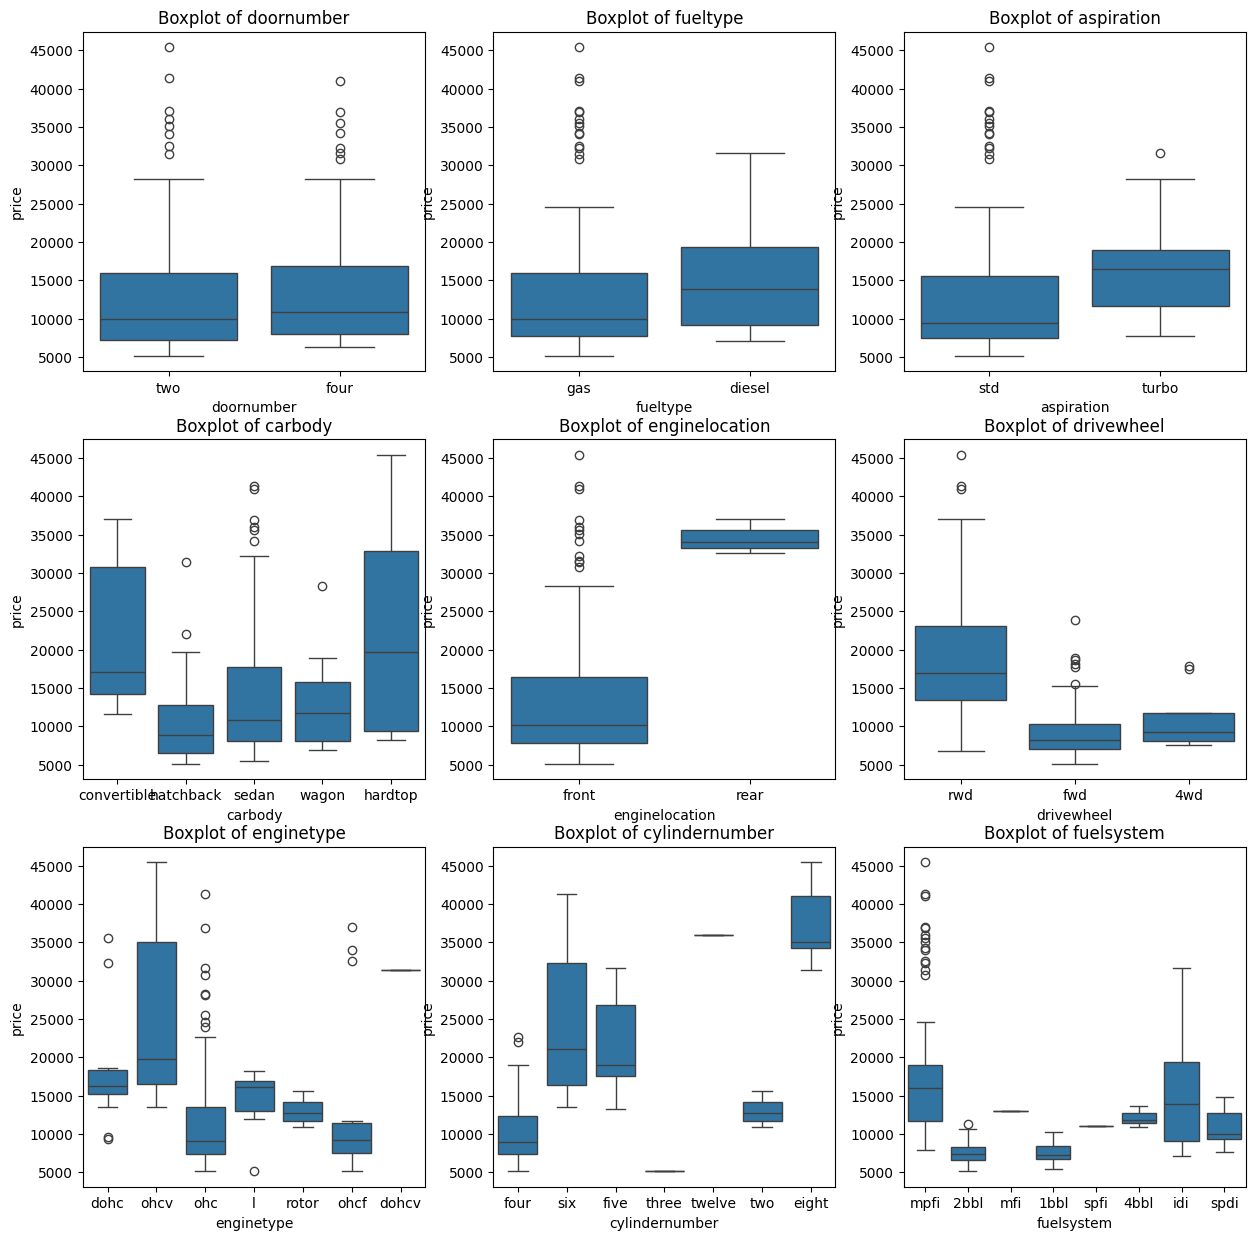

In [478]:
features=['doornumber','fueltype','aspiration','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem']

plt.figure(figsize=(15, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = feature, y = 'price', data = train_df)
    plt.title(f'Boxplot of {feature}')

plt.show()

In [479]:
print(f"fueltype: {train_df['fueltype'].unique()}")
print(f"aspiration: {train_df['aspiration'].unique()}")
print(f"doornumber: {train_df['doornumber'].unique()}")
print(f"carbody: {train_df['carbody'].unique()}")
print(f"drivewheel: {train_df['drivewheel'].unique()}")
print(f"enginelocation: {train_df['enginelocation'].unique()}")
print(f"enginetype: {train_df['enginetype'].unique()}")
print(f"cylindernumber: {train_df['cylindernumber'].unique()}")
print(f"fuelsystem: {train_df['fuelsystem'].unique()}")

fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [480]:
train_df['fueltype'] = train_df['fueltype'].map({'gas': 0, 'diesel': 1})
train_df['aspiration'] = train_df['aspiration'].map({'std': 0, 'turbo': 1})
train_df['doornumber'] = train_df['doornumber'].map({'two': 0, 'four': 1})
train_df['carbody'] = train_df['carbody'].map({'convertible': 0, 'hatchback': 1, 'sedan':2, 'wagon':3, 'hardtop': 4})
train_df['drivewheel'] = train_df['drivewheel'].map({'rwd': 0, 'fwd': 1, '4wd':2})
train_df['enginelocation'] = train_df['enginelocation'].map({'front': 0, 'rear': 1})
train_df['enginetype'] = train_df['enginetype'].map({'dohc': 0, 'ohcv': 1, 'ohc': 2, 'l': 3, 'rotor': 4, 'ohcf': 5, 'dohcv': 6})
train_df['cylindernumber'] = train_df['cylindernumber'].map({'four': 0, 'six': 1, 'five': 2, 'three': 3, 'twelve': 4, 'two': 5, 'eight': 6})
train_df['fuelsystem'] = train_df['fuelsystem'].map({'mpfi': 0, '2bbl': 1, 'mfi': 2, '1bbl': 3, 'spfi': 4, '4bbl': 5, 'idi': 6, 'spdi': 7})

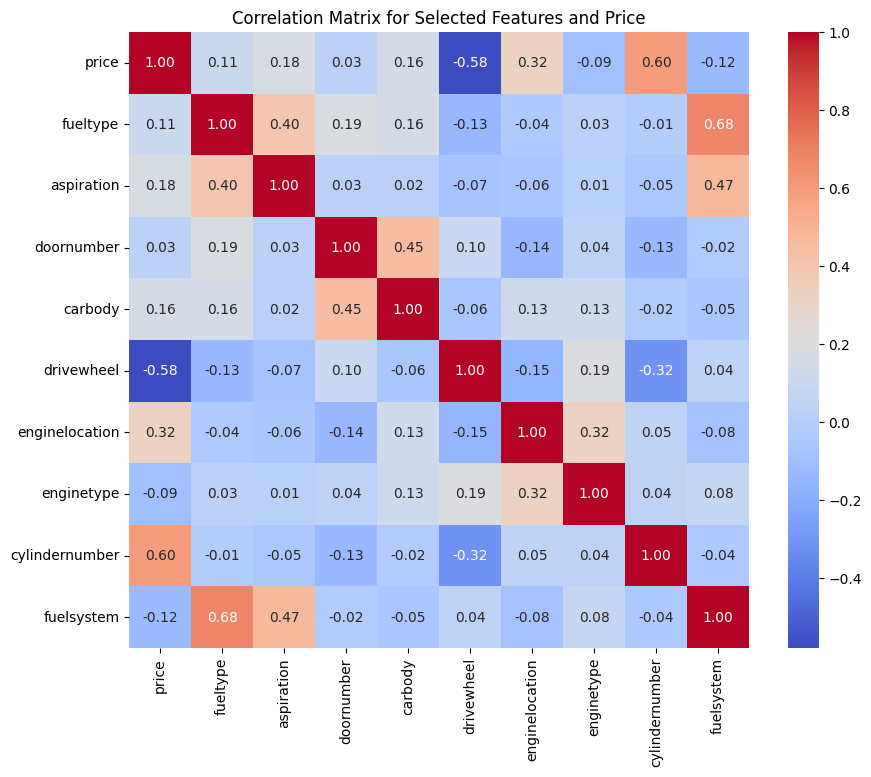

In [481]:
corr_matrix = train_df.corr(numeric_only=True)

features = ['price', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

filtered_corr_matrix = corr_matrix.loc[features, features]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Features and Price')
plt.show()

In [482]:
single_word_cars = train_df['CarName'][train_df['CarName'].str.split().apply(len) == 1]

train_df[['make', 'model']] = train_df['CarName'].str.extract(r'^([\w-]+)\s+(.*)$')

train_df.loc[train_df['CarName'].str.split().apply(len) == 1, 'make'] = train_df['CarName']
train_df.loc[train_df['CarName'].str.split().apply(len) == 1, 'model'] = np.nan

In [483]:
train_df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [484]:
corrections = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

train_df['make'] = train_df['make'].replace(corrections)

In [485]:
make_counts = train_df['make'].value_counts()
make_avg_price = train_df.groupby('make')['price'].mean()

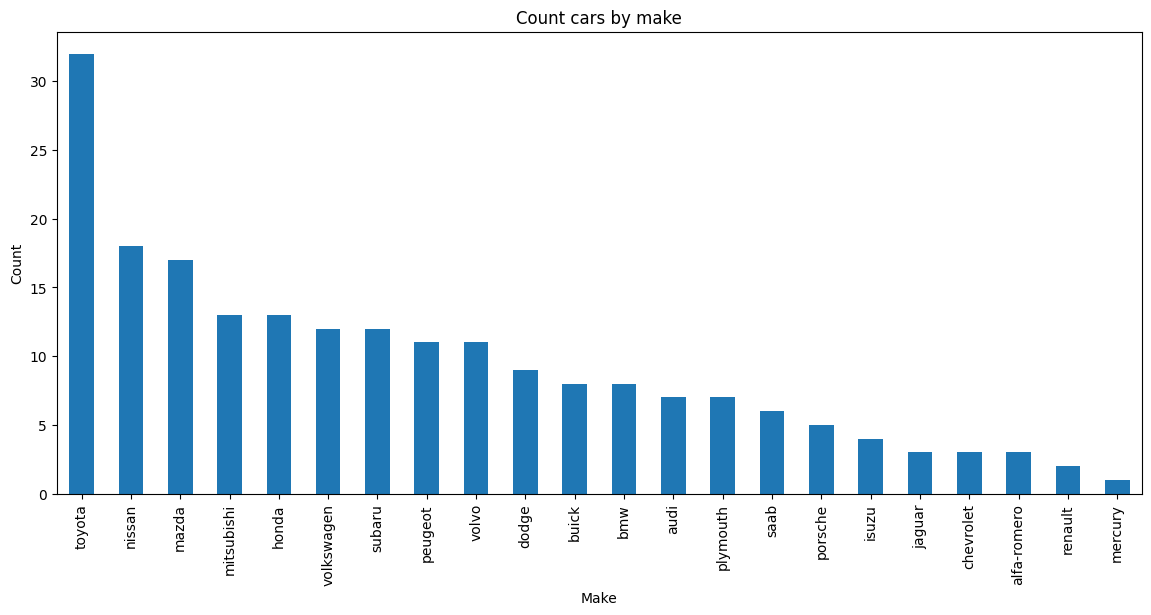

In [486]:
plt.figure(figsize=(14, 6))
make_counts.plot(kind='bar')
plt.title('Count cars by make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

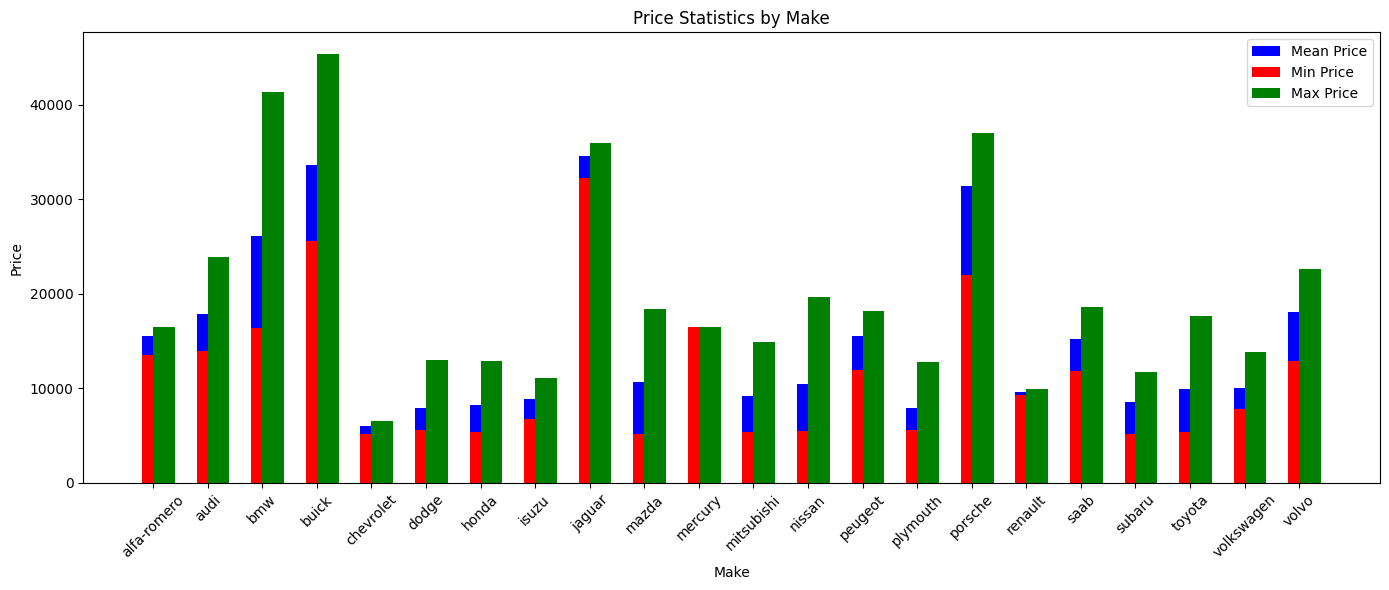

In [487]:
make_price_stats = train_df.groupby('make')['price'].agg(['min', 'mean', 'max'])

plt.figure(figsize=(14, 6))

bar_width = 0.4

plt.bar(make_price_stats.index, make_price_stats['mean'], width=bar_width, color='blue', label='Mean Price')
plt.bar(make_price_stats.index, make_price_stats['min'], width=bar_width, color='red', label='Min Price', align='center')
plt.bar(make_price_stats.index, make_price_stats['max'], width=bar_width, color='green', label='Max Price', align='edge')

plt.title('Price Statistics by Make')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()